In [38]:
# Importing libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from datetime import datetime
import os


In [39]:
# Reading the data

In [40]:
df_offers= pd.read_csv("./datasets/data_offers.csv")
df_orders = pd.read_csv("./datasets/data_orders.csv")


In [41]:
df_offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [42]:
df_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [43]:
df_orders['order_datetime'] = df_orders['order_datetime'].apply(lambda x: datetime.strptime(x,'%H:%M:%S'))

In [44]:
df_orders['order_status_key']= df_orders['order_status_key'].map({4 :'Client_cancelled',9:'Reject'})
df_orders['is_driver_assigned_key']= df_orders['is_driver_assigned_key'].map({1 :'Driver_Assigned',0:'Not_Assigned'})

In [45]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_datetime                 10716 non-null  datetime64[ns]
 1   origin_longitude               10716 non-null  float64       
 2   origin_latitude                10716 non-null  float64       
 3   m_order_eta                    2814 non-null   float64       
 4   order_gk                       10716 non-null  int64         
 5   order_status_key               10716 non-null  object        
 6   is_driver_assigned_key         10716 non-null  object        
 7   cancellations_time_in_seconds  7307 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 669.9+ KB


In [54]:
df_orders[df_orders['cancellations_time_in_seconds'].isnull() == False]

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,hours
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,Client_cancelled,Driver_Assigned,198.0,18
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,Client_cancelled,Not_Assigned,128.0,20
2,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,Client_cancelled,Driver_Assigned,46.0,12
3,1900-01-01 13:50:20,-1.054671,51.460544,658.0,3000582941169,Client_cancelled,Driver_Assigned,62.0,13
9,1900-01-01 06:33:52,-0.976216,51.433202,NaN,3000582765616,Client_cancelled,Not_Assigned,78.0,6
...,...,...,...,...,...,...,...,...,...
10711,1900-01-01 13:11:35,-0.975372,51.457846,NaN,3000599186906,Client_cancelled,Not_Assigned,36.0,13
10712,1900-01-01 13:13:55,-0.975372,51.457846,NaN,3000599186962,Client_cancelled,Not_Assigned,4.0,13
10713,1900-01-01 13:17:21,-0.972926,51.457693,60.0,3000599187034,Client_cancelled,Driver_Assigned,34.0,13
10714,1900-01-01 13:16:28,-0.975372,51.457846,NaN,3000599187024,Client_cancelled,Not_Assigned,6.0,13


In [46]:
# 1 : distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection

<Axes: xlabel='order_status_key', ylabel='count'>

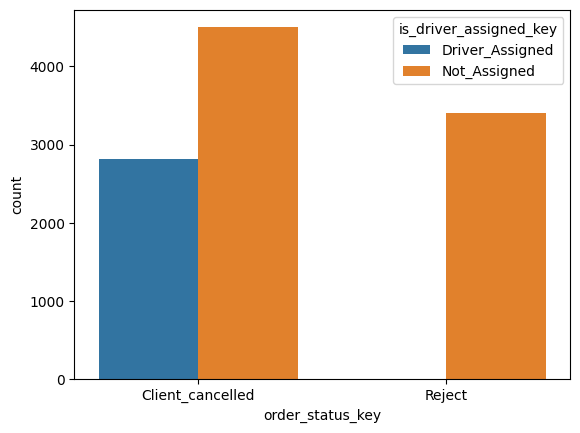

In [47]:
sns.countplot(data=df_orders, x = 'order_status_key',hue='is_driver_assigned_key')

We observe a high number of orders cancelled before a driver is assigned, implying that maybe customers have waited too long and have decided on an alternative for their transportation needs

In [ ]:
#2: distribution of failed orders by hours

In [48]:

df_orders['hours'] = df_orders['order_datetime'].dt.hour

<Axes: xlabel='hours', ylabel='count'>

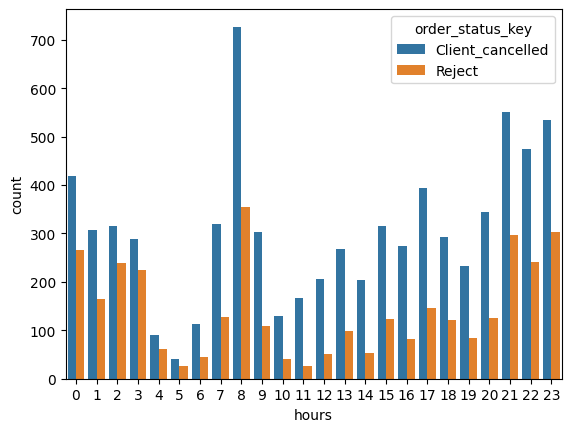

In [49]:
sns.countplot(data = df_orders,x='hours',hue='order_status_key')

The four system rejects with the assigned driver occurred around midnight and at 8 am in the morning. The rest of the categories follow similar distribution, with the client cancellations with the assigned driver having a substantially lower count during the night hours.

In [ ]:
#3  average time to cancellation with and without driver, by the hour. 

In [51]:
df_average = df_orders[df_orders['order_status_key'] =='Client_cancelled']

<Axes: xlabel='hours', ylabel='cancellations_time_in_seconds'>

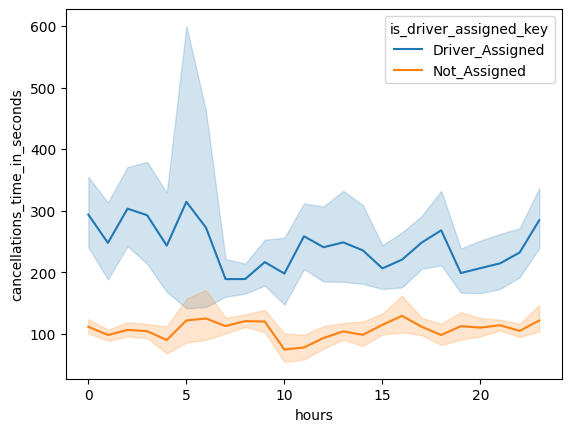

In [56]:
sns.lineplot(data = df_average,x='hours',y='cancellations_time_in_seconds',hue='is_driver_assigned_key',estimator=np.mean)

The average time to cancellation is higher on orders with an assigned driver than without, for each hour without exception. The peak occurs at 3 A.M. At this time there are a lot of client cancellations, so a logical explanation would be that clients have waited too long for the driver.

<Axes: title={'center': 'Average ETA per hour'}, xlabel='hours'>

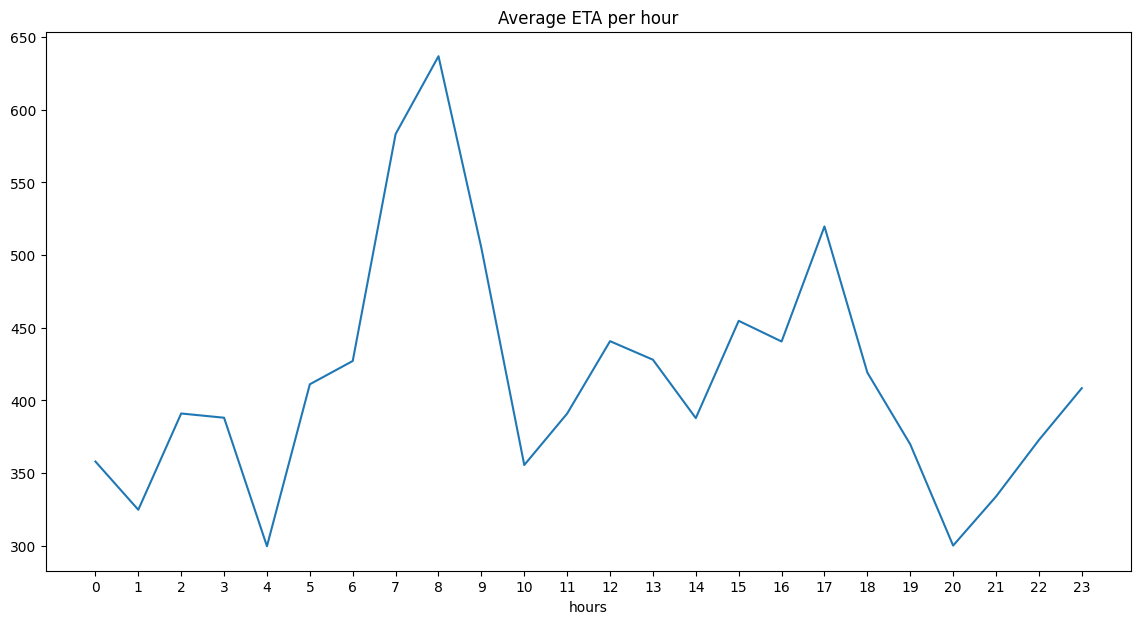

In [60]:
#4 Distribution of average ETA by hours.

df_orders.groupby(by="hours")["m_order_eta"].mean().plot(figsize=(14, 7),
                                                           xticks=range(0, 24),
                                                           title="Average ETA per hour")

In [ ]:
#Using the h3 and folium packages, calculate how many size 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

In [74]:
!pip3 install h3 folium geojson -q

In [65]:
import h3
import folium

In [67]:
df_orders["hex_id"] = df_orders.apply(
    func=lambda row: h3.geo_to_h3(lat=row["origin_latitude"], lng=row["origin_longitude"], resolution=8), axis=1)

In [68]:
grouped_q5 = df_orders.groupby(by="hex_id")["order_gk"].count()
grouped_q5.shape

(144,)

In [69]:
grouped_q5 = grouped_q5.reset_index()
grouped_q5.sample(n=5, random_state=42)

,hex_id,order_gk
117,88195d2b51fffff,98
19,88195d284bfffff,8
82,88195d2aebfffff,2
97,88195d2b1dfffff,1497
56,88195d2a15fffff,21


In [70]:
grouped_q5 = grouped_q5.sort_values(by="order_gk")  # 1
total_orders = grouped_q5["order_gk"].sum()  # 2
grouped_q5["cum_sum"] = grouped_q5["order_gk"].cumsum()  # 3
grouped_q5["cum_perc"] = 100 * grouped_q5["cum_sum"] / total_orders  # 4
grouped_q5[grouped_q5["cum_perc"] <= 80]  # 5

,hex_id,order_gk,cum_sum,cum_perc
72,88195d2a3bfffff,1,1,0.009332
142,88195d74d5fffff,1,2,0.018664
3,88195d2807fffff,1,3,0.027996
7,88195d281dfffff,1,4,0.037327
8,88195d2821fffff,1,5,0.046659
...,...,...,...,...
63,88195d2a27fffff,414,5548,51.773050
20,88195d284dfffff,653,6201,57.866741
95,88195d2b19fffff,667,6868,64.091079
91,88195d2b11fffff,707,7575,70.688690


In [72]:
map = folium.Map(location=[df_orders["origin_latitude"].mean(), df_orders["origin_longitude"].mean()],
                 zoom_start=8.5,  # after a bit of experimentation, we thought this presents the map best
                 tiles="cartodbpositron")


In [75]:
import json
import geojson


def to_geojson(row):
    """Transform hex_id into a geojson object."""
    geometry = {
        "type": "Polygon",
        "coordinates": [h3.h3_to_geo_boundary(h=row["hex_id"], geo_json=True)]
    }
    return geojson.Feature(id=row["hex_id"], geometry=geometry, properties={"order_gk": row["order_gk"]})


geojsons = grouped_q5.apply(func=to_geojson, axis=1).values.tolist()
geojson_str: str = json.dumps(geojson.FeatureCollection(geojsons))

In [77]:
import matplotlib
# instantiate a colormap object for better visualisation
colormap = matplotlib.cm.get_cmap(name="plasma")
max_order_gk = grouped_q5["order_gk"].max()
min_order_gk = grouped_q5["order_gk"].min()

/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_52441/2199708594.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(name="plasma")


In [78]:
_ = folium.GeoJson(data=geojson_str, style_function=lambda f: {
    "fillColor": matplotlib.colors.to_hex(
        colormap((f["properties"]["order_gk"] - min_order_gk) / (max_order_gk - min_order_gk))),
    "color": "black",
    "weight": 1,
    "fillOpacity": 0.7
}).add_to(map)

In [79]:
map
